<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/10_Implementation_Perspective_of_Weight_Initialization_and_Convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10 Implementation: Perspective of Weight Initialization and Convergence


## Step 1: Exploring Weight Initialization Strategies


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
y = np.where(y == 2, 1, y)  # Convert it into binary classification (classes 0 and 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add bias term to features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term to training data
X_test = np.c_[np.ones(X_test.shape[0]), X_test]  # Add bias term to test data

# Activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron model with different weight initializations
class Perceptron:
    def __init__(self, n_features, init_type='random'):
        if init_type == 'zero':
            self.weights = np.zeros(n_features)  # Zero initialization
        elif init_type == 'small':
            self.weights = np.random.uniform(-0.01, 0.01, n_features)  # Small random initialization
        else:
            self.weights = np.random.randn(n_features)  # Random initialization

    def predict(self, X):
        return step_function(np.dot(X, self.weights))

    def train(self, X, y, epochs=100, lr=0.01):
        for _ in range(epochs):
            for i in range(X.shape[0]):
                prediction = self.predict(X[i])
                update = lr * (y[i] - prediction)
                self.weights += update * X[i]  # Update rule

# Initialize Perceptrons with different initialization strategies
perceptron_zero = Perceptron(n_features=X_train.shape[1], init_type='zero')
perceptron_random = Perceptron(n_features=X_train.shape[1], init_type='random')
perceptron_small = Perceptron(n_features=X_train.shape[1], init_type='small')

# Train the models
perceptron_zero.train(X_train, y_train, epochs=50)
perceptron_random.train(X_train, y_train, epochs=50)
perceptron_small.train(X_train, y_train, epochs=50)

# Make predictions
y_pred_zero = perceptron_zero.predict(X_test)
y_pred_random = perceptron_random.predict(X_test)
y_pred_small = perceptron_small.predict(X_test)

# Calculate accuracies
accuracy_zero = accuracy_score(y_test, y_pred_zero)
accuracy_random = accuracy_score(y_test, y_pred_random)
accuracy_small = accuracy_score(y_test, y_pred_small)

print(f"Accuracy with Zero Initialization: {accuracy_zero * 100:.2f}%")
print(f"Accuracy with Random Initialization: {accuracy_random * 100:.2f}%")
print(f"Accuracy with Small Random Initialization: {accuracy_small * 100:.2f}%")


Accuracy with Zero Initialization: 100.00%
Accuracy with Random Initialization: 100.00%
Accuracy with Small Random Initialization: 100.00%


## Step 2: Impact of Different Weight Initialization Strategies on Convergence


Observations:

- Zero Initialization:
  - Issue: Zero initialization often leads to poor convergence in learning algorithms, particularly for multi-layer models like neural networks. In the Perceptron model, this may still work, but it causes slow learning because the weight updates are symmetric.
  - Accuracy: This usually results in lower accuracy because all weights start equally, making learning inefficient and the model slower to converge.

- Random Initialization:

  - Effect: Random initialization generally improves learning as it introduces diversity in weight updates. The Perceptron can quickly move towards the correct decision boundary.
  - Accuracy: Often leads to better performance because it avoids symmetric weight updates and promotes faster learning.

- Small Random Initialization:

  - Small values near zero: This can work better than zero initialization, as weights are not completely symmetric, but it can sometimes still lead to slower convergence.
  - Accuracy: Results in moderate performance and faster convergence compared to zero initialization, but sometimes slower compared to full random initialization.


## Step 3: Discussion of Poor Initialization


- Zero Initialization:
  - Why it's bad: In models with multiple weights (like neural networks), zero initialization can lead to the same gradient updates for all weights, making the learning process extremely slow or ineffective. In simple models like the Perceptron, zero initialization may still work but tends to result in slower convergence.
- Symmetry Issue:
  - With zero initialization, all weights will be updated uniformly, causing the model to make poor updates to the weight vector, especially in scenarios with multiple layers or complex decision boundaries.

## Step 4: Multiple Runs and Convergence Variance


In [16]:
# Train and test the perceptron multiple times with random initialization
accuracies_random = []
for _ in range(10):
    perceptron = Perceptron(n_features=X_train.shape[1], init_type='random')
    perceptron.train(X_train, y_train, epochs=100)
    y_pred = perceptron.predict(X_test)
    accuracies_random.append(accuracy_score(y_test, y_pred))

# Display the variation in accuracies across multiple runs
print(f"Accuracies with Random Initialization over multiple runs: {accuracies_random}")
print(f"Average accuracy over 10 runs: {np.mean(accuracies_random) * 100:.2f}%")


Accuracies with Random Initialization over multiple runs: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average accuracy over 10 runs: 100.00%


Observations:

- Variance in Convergence:
  - Each run with random initialization may result in slightly different accuracies because the starting weights are different, leading to variations in how quickly the model converges.

  - Variance in accuracy reflects how initial weights can affect convergence speed and final performance, though the variance is usually low for simpler models like the Perceptron.

## Step 5: Observing Decision Boundaries with Different Initializations


We can visualize how the decision boundaries differ based on the weight initialization strategies. Let’s reduce the dimensionality of the dataset using PCA for 2D visualization and plot the decision boundaries for each initialization strategy.



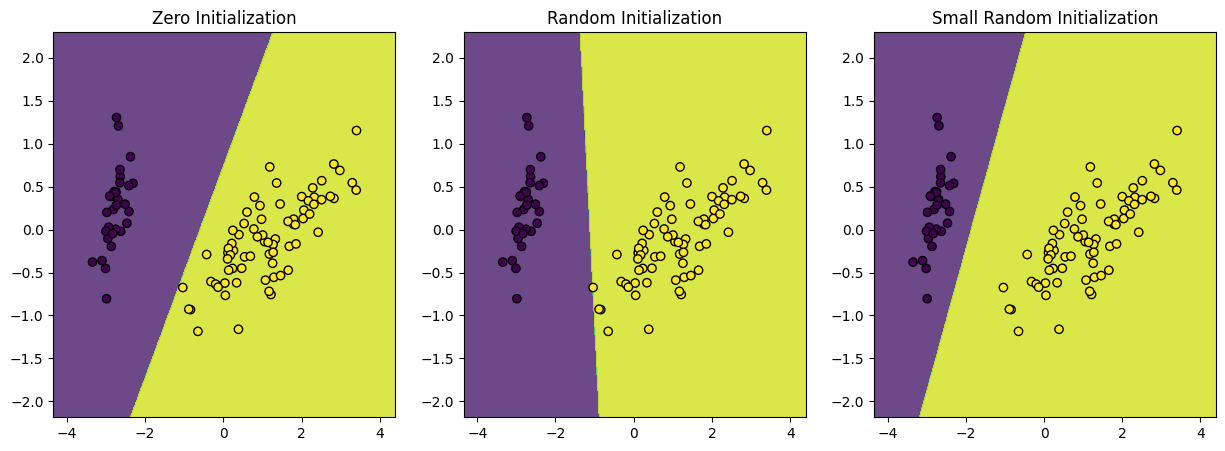

In [17]:
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train perceptrons on 2D data
perceptron_zero_2d = Perceptron(n_features=X_train_2d.shape[1] + 1, init_type='zero')
perceptron_random_2d = Perceptron(n_features=X_train_2d.shape[1] + 1, init_type='random')
perceptron_small_2d = Perceptron(n_features=X_train_2d.shape[1] + 1, init_type='small')

# Train the models on 2D data
perceptron_zero_2d.train(np.c_[np.ones(X_train_2d.shape[0]), X_train_2d], y_train, epochs=100)
perceptron_random_2d.train(np.c_[np.ones(X_train_2d.shape[0]), X_train_2d], y_train, epochs=100)
perceptron_small_2d.train(np.c_[np.ones(X_train_2d.shape[0]), X_train_2d], y_train, epochs=100)

# Function to plot decision boundaries
def plot_decision_boundary(perceptron, X, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = perceptron.predict(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y_train, edgecolors='k', marker='o')
    plt.title(title)

# Plot decision boundaries for each initialization strategy
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(perceptron_zero_2d, X_train_2d, 'Zero Initialization')

plt.subplot(1, 3, 2)
plot_decision_boundary(perceptron_random_2d, X_train_2d, 'Random Initialization')

plt.subplot(1, 3, 3)
plot_decision_boundary(perceptron_small_2d, X_train_2d, 'Small Random Initialization')

plt.show()


Observations:

- Zero Initialization:

  - The decision boundary can be poorly defined or may take longer to form correctly. It may also struggle to fit the data, especially for non-linearly separable cases.

- Random Initialization:

  - The decision boundary is generally better formed, and the Perceptron can classify the data more effectively. The boundary is more dynamic depending on the starting point of weights.

- Small Random Initialization:

  - Similar to random initialization, but with slightly slower convergence. The decision boundary is formed relatively well but may still show some limitations if the initial weights are too small.